In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt 
import numpy as np
from sklearn.metrics import mean_squared_error

In [2]:
# 1. Load MNIST dataset
(x_train, _), (x_test, _) = tf.keras.datasets.mnist.load_data()
x_train = x_train / 255.0
x_test = x_test / 255.0

In [3]:
# Flatten images
x_train = x_train.reshape(len(x_train), -1)
x_test = x_train.reshape(len(x_train), -1)

input_dim = x_train.shape[1]
encoding_dim = 64

In [4]:
# 2. Build Autoencoder
# Encoder
input_img = layers.Input(shape=(input_dim, ))
encoded = layers.Dense(128, activation='relu')(input_img)
encoded = layers.Dense(encoding_dim, activation='relu')(encoded)

2025-11-13 09:37:45.652055: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2025-11-13 09:37:45.652228: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2025-11-13 09:37:45.652245: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2025-11-13 09:37:45.652594: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-11-13 09:37:45.652615: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [5]:
# Decoder
decoded = layers.Dense(128, activation='relu')(encoded)
decoded = layers.Dense(input_dim, activation='sigmoid')(decoded)

In [6]:
# Autoencoder Model
autoencoder = models.Model(input_img, decoded)

In [7]:
# Encoder Model (for visualisation)
encoder = models.Model(input_img, encoded)

In [8]:
# 3. Compile Autoencoder
autoencoder.compile(
    optimizer='adam', 
    loss='binary_crossentropy'
)

In [9]:
# 4. Train Autoencoder
history = autoencoder.fit(
    x_train, x_train, 
    epochs = 10, 
    batch_size = 256, 
    shuffle=True, 
    validation_data = (x_test, x_test)
)

Epoch 1/10


2025-11-13 09:37:47.402501: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


235/235 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step - loss: 0.2166 - val_loss: 0.1535
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - loss: 0.6334 - val_loss: 3.6205
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - loss: 17.2080 - val_loss: 38.2761
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - loss: 62.2961 - val_loss: 93.3556
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 24ms/step - loss: 135.0130 - val_loss: 183.8364
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 24ms/step - loss: 235.1673 - val_loss: 303.0176
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 364.2428 - val_loss: 464.6313
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 24ms/step - loss: 514.0749 - val_loss: 595.7983
Epoch 9/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - loss: 682.4923 - val_loss: 811.7297
Epoch 10/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - loss: 875.9798 - val_loss: 1056.9066


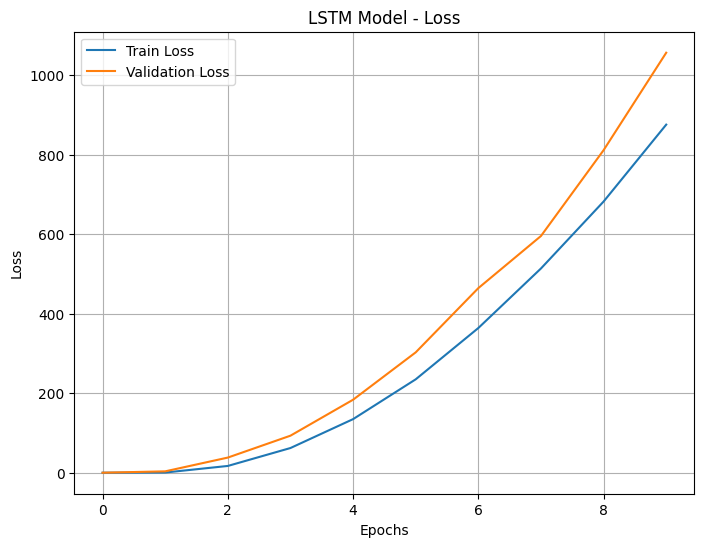

In [10]:
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("LSTM Model - Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()

In [11]:
# 6. Encode and Decode Images
encoded_imgs = encoder.predict(x_test)
decoded_imgs = autoencoder.predict(x_test)

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


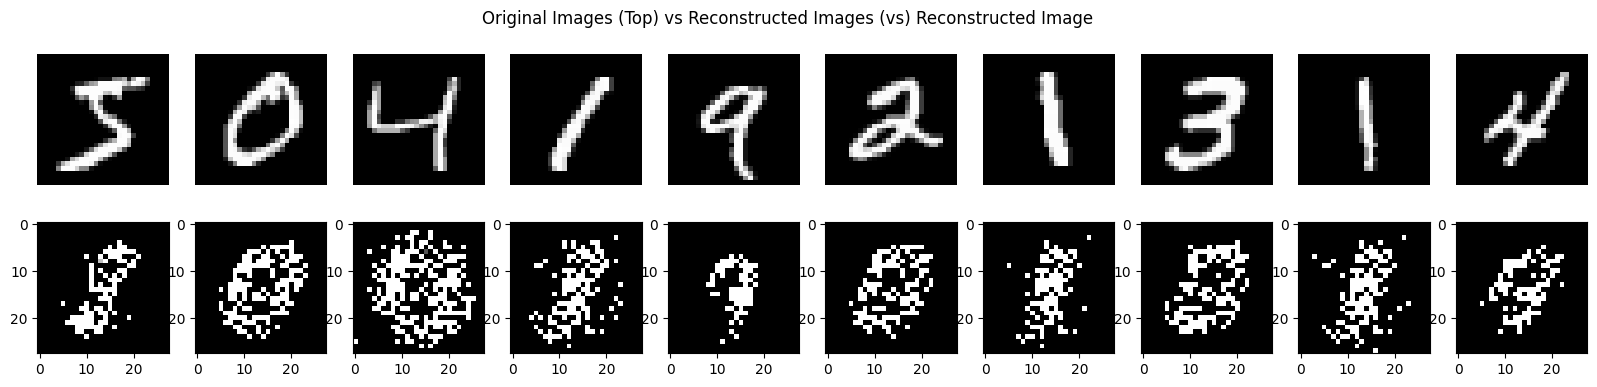

In [12]:
# 7. Visualisation: Original vs Reconstructed
n = 10
plt.figure(figsize=(20, 4))      
for i in range(n): 
    # original 
    ax = plt.subplot(2, n, i+1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.axis('off')

    # Reconstructed
    ax = plt.subplot(2, n, i+1+n)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap='gray')

plt.suptitle("Original Images (Top) vs Reconstructed Images (vs) Reconstructed Image")
plt.show()